# Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

from pycocotools.coco import COCO

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 20.0)

In [2]:
def plot_instances_classes(anns, catNames):
    # Visualize number of instances in the sampled images
    num_instances_sampled = dict()

    # Extract category ids from each annotation
    for i in range(len(anns)):
        temp_cat = anns[i]['category_id']
        num_instances_sampled[str(temp_cat)] = num_instances_sampled.get(str(temp_cat), 0) + 1

    # Sort by category id and plot
    num_instances_sampled_sorted = dict()
    names = []

    for i in catNames.keys():
        try:
            num_instances_sampled_sorted[str(i)] = num_instances_sampled[str(i)]
            names.append(catNames[str(i)])
        except KeyError:
           pass
        
    plt.figure()
    plt.bar(names, num_instances_sampled_sorted.values())
    plt.xticks(rotation=90)
    plt.show()

# Full dataset
Before sampling

loading annotations into memory...
Done (t=1.33s)
creating index...
index created!


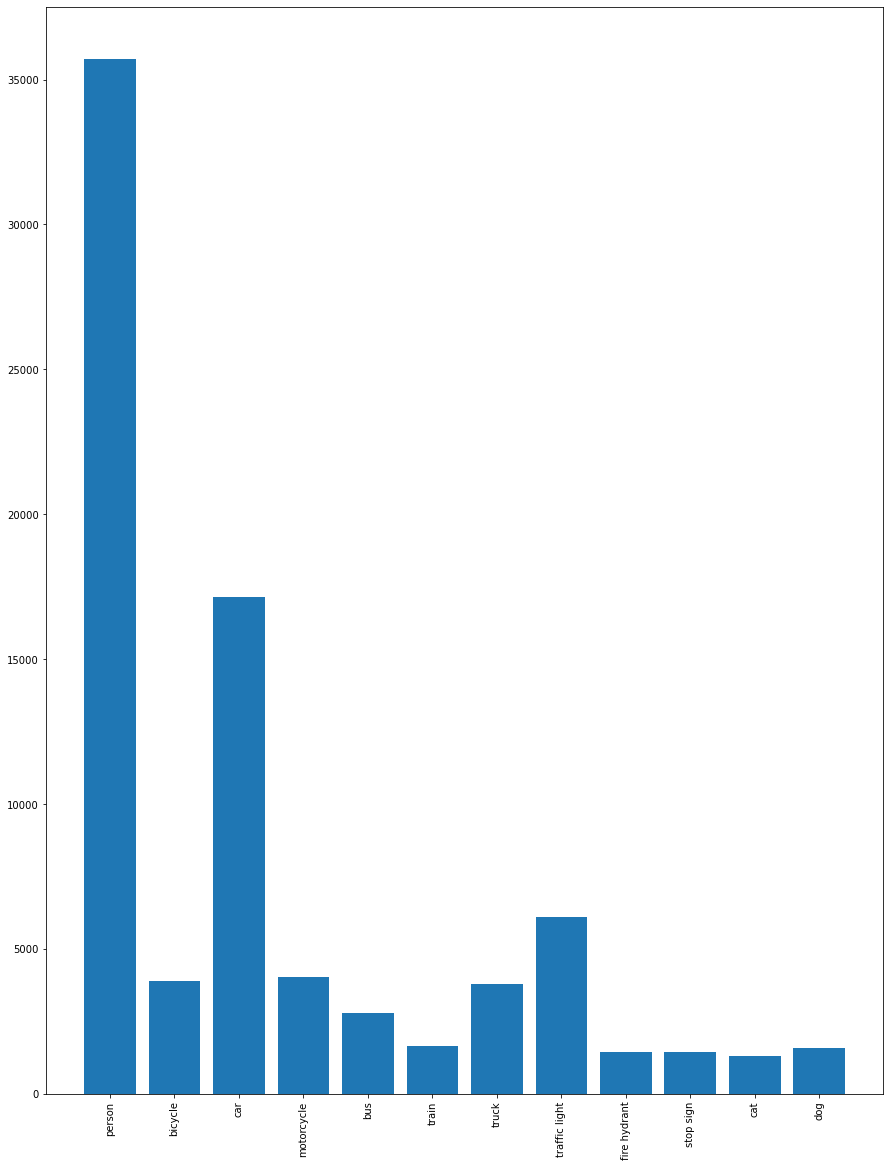

In [8]:
annFile='{}/annotations/instances_{}.json'.format("..", "traffic")

# initialize COCO api for instance annotations
coco=COCO(annFile)
imgIds = coco.getImgIds()

# load COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

# Map category ids to names
catIds = coco.getCatIds()

catNames = dict()
for i in range(len(catIds)):
    catNames[str(cats[i]['id'])] = cats[i]['name']

# Load annotations
annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)

plot_instances_classes(anns, catNames)

# Train and val set

loading annotations into memory...
Done (t=0.98s)
creating index...
index created!


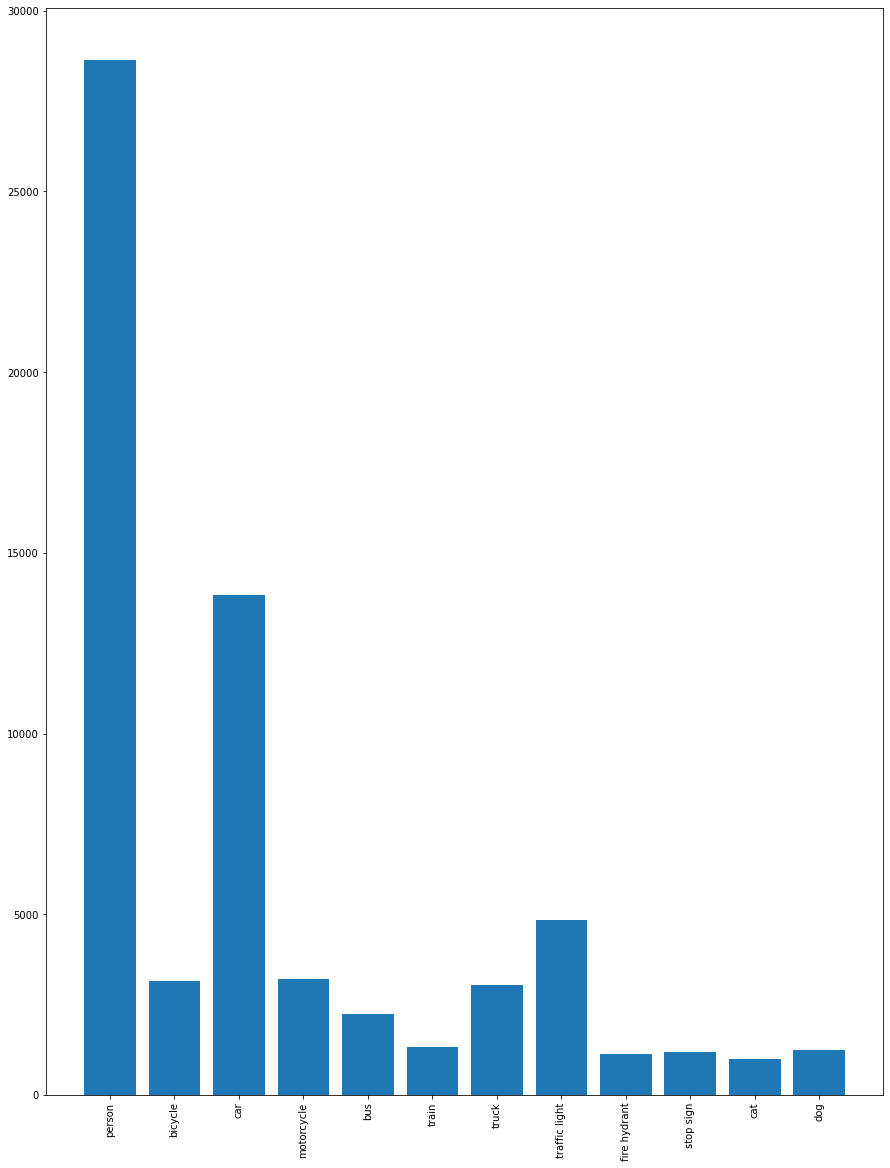

In [9]:
annFile='{}/annotations/instances_{}.json'.format("..", "trainTraffic")
# initialize COCO api for instance annotations
coco=COCO(annFile)
imgIds = coco.getImgIds()
# load COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
# Map category ids to names
catIds = coco.getCatIds()
catNames = dict()
for i in range(len(catIds)):
    catNames[str(cats[i]['id'])] = cats[i]['name']
# Load annotations
annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)
plot_instances_classes(anns, catNames)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


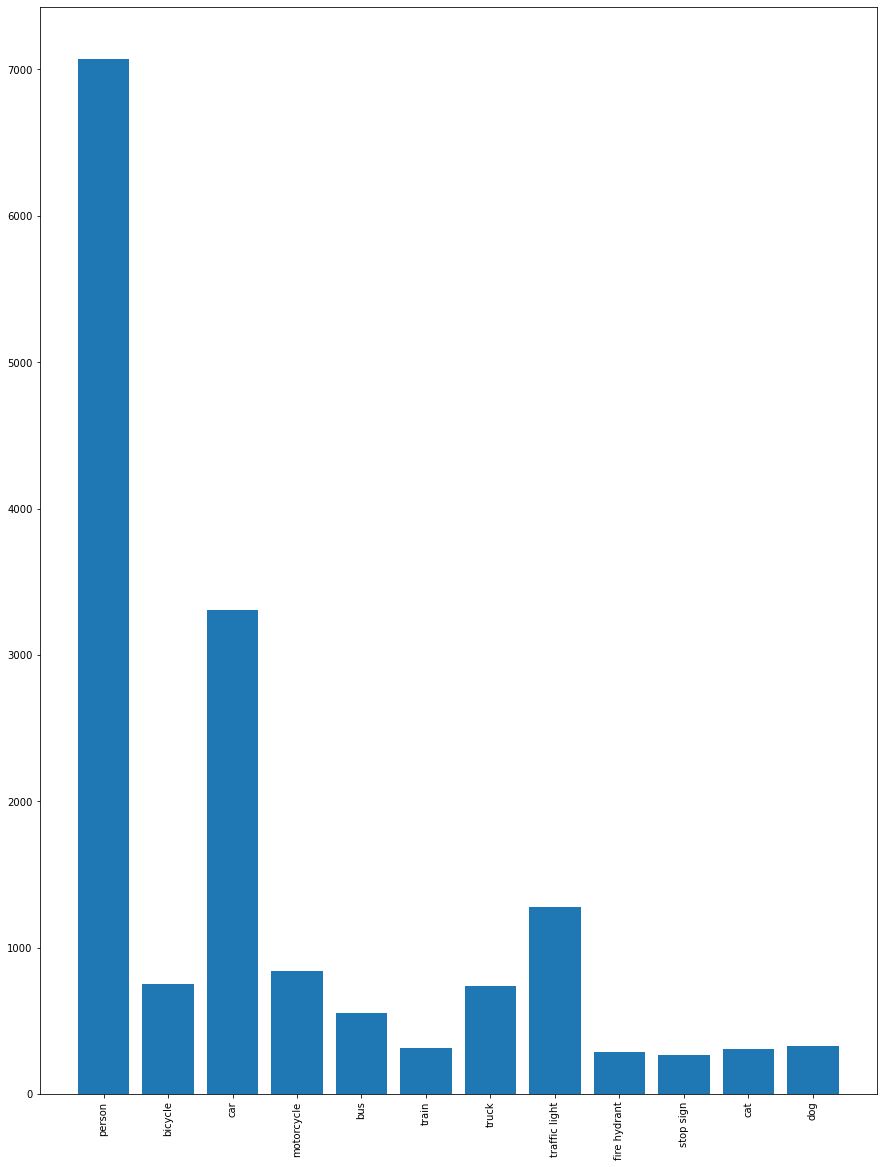

In [10]:
annFile='{}/annotations/instances_{}.json'.format("..", "valTraffic")
# initialize COCO api for instance annotations
coco=COCO(annFile)
imgIds = coco.getImgIds()
# load COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
# Map category ids to names
catIds = coco.getCatIds()
catNames = dict()
for i in range(len(catIds)):
    catNames[str(cats[i]['id'])] = cats[i]['name']
# Load annotations
annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)
plot_instances_classes(anns, catNames)